In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [111]:
path = '/content/IPL2016.csv'
IPL = pd.read_csv(path)
IPL.head(16)
#So,we have ID that is 1,2,3,.... & Overall collective strike rate of ABD+VK & Won/loss columns

,Unnamed: 0,overall_sr,won
0,1,168.817204,1
1,2,165.432099,0
2,3,121.568627,0
3,4,149.541284,1
4,5,151.898734,0
5,6,124.489796,0
6,7,112.000000,0
7,8,178.688525,1
8,9,150.000000,1
9,10,91.176471,0


# Our Goal is to find a function, such that if we input the collective strike rate of ABD and VK, we can get an accurate probability of RCB winning the match via Logistic Regression

In [123]:
#We are given overall_sr as a input variable and we have to classify that who won via Logistic Regression !! (THE PROBABILITY) : RCB WON:1 & RCB LOST:0
X = np.array(IPL[['overall_sr']])
Y = np.array(IPL['won'])

In [124]:
X,Y

(array([[168.8172043 ],
        [165.43209877],
        [121.56862745],
        [149.5412844 ],
        [151.89873418],
        [124.48979592],
        [112.        ],
        [178.68852459],
        [150.        ],
        [ 91.17647059],
        [222.42990654],
        [163.41463415],
        [217.30769231],
        [113.20754717],
        [161.2244898 ],
        [143.90243902]]),
 array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]))

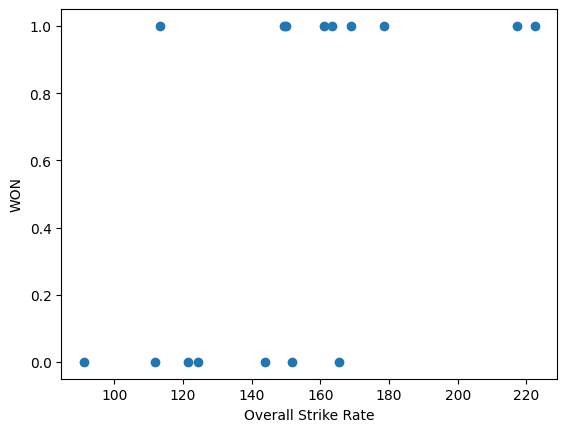

In [125]:
plt.scatter(X, Y)
plt.xlabel('Overall Strike Rate')
plt.ylabel('WON')
plt.show()
#basic scatter plot of datapoints

In [126]:
from sklearn.linear_model import LogisticRegression
ModeL = LogisticRegression()
ModeL.fit(X,Y)
intercept = ModeL.intercept_[0]
coefficient = ModeL.coef_[0][0]

def predict_probability(strike_rate):
    logit = intercept + coefficient * strike_rate
    return 1 / (1 + np.exp(-logit))

X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_prob = ModeL.predict_proba(X_test)[:, 1]

#To calculate Strike rate at which the probability is 0.5(boundary)
strhalfProb = -intercept/coefficient
print(strhalfProb)

143.57528733194104


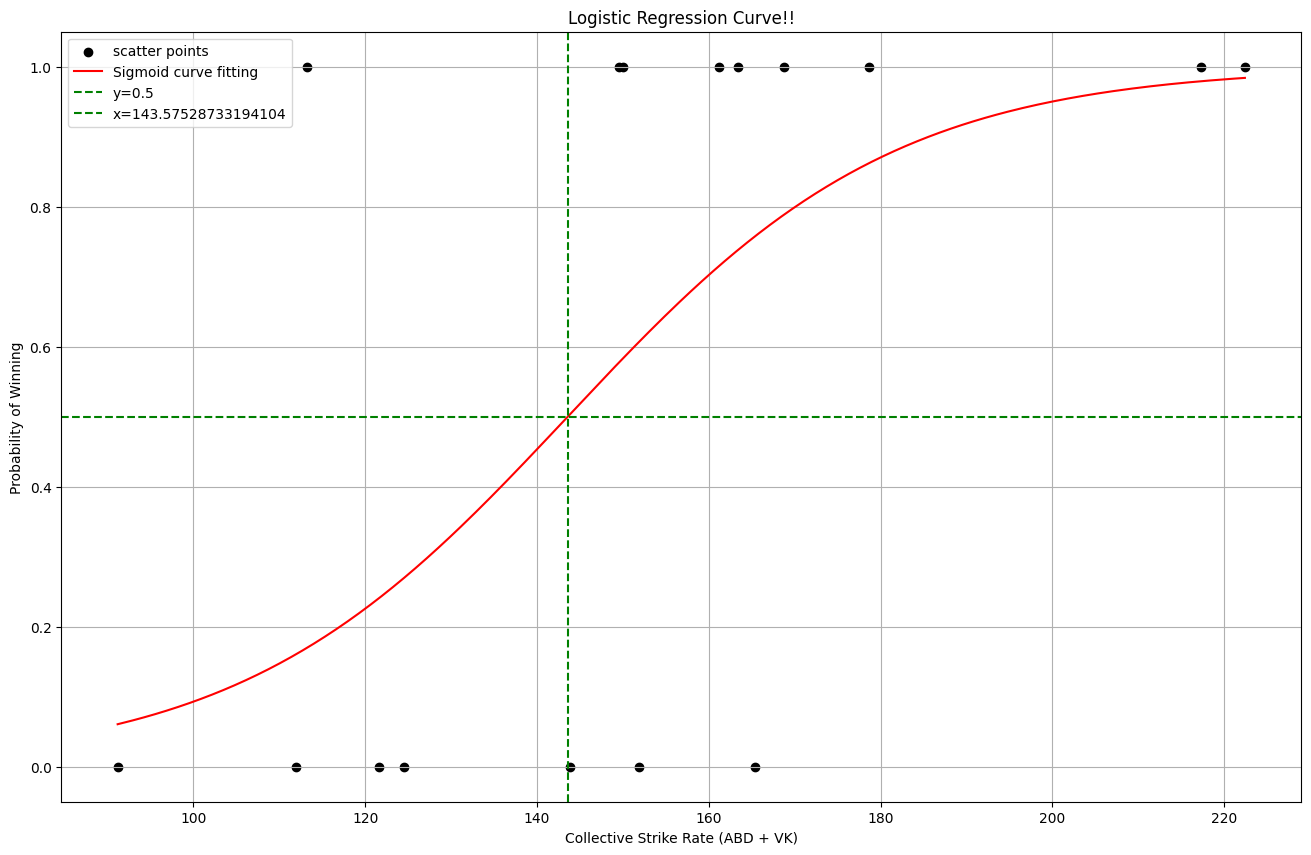

In [127]:
plt.figure(figsize=(16, 10))
plt.scatter(X, Y, color='black', label='scatter points')
plt.plot(X_test, y_prob, color='red', label='Sigmoid curve fitting')
plt.xlabel('Collective Strike Rate (ABD + VK)')
plt.ylabel('Probability of Winning')
plt.title('Logistic Regression Curve!!')
plt.axhline(y=0.5, color='green', linestyle='--', label='y=0.5')
plt.axvline(x=143.57528733194104, color='green', linestyle='--', label='x=143.57528733194104')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")

Strike_Rate_EXAMPLE  = 157
predicted_probability = predict_probability(example_strike_rate)
print(f"The predicted probability of winning for a strike rate of {Strike_Rate_EXAMPLE } is {predicted_probability}")

Intercept: -7.505103426433888
Coefficient: 0.05227294728710764
The predicted probability of winning for a strike rate of 157 is 0.6685754998022185
